# Imports 

In [1]:
import os
import sys

sys.path.append("../src")
FIG_PATH = "../fig"

import random
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import text_flappy_bird_gym
from IPython.display import clear_output

from agents import BaseAgent

np.random.seed(42)
random.seed(42)

# Baseline

### Random Agent ###


100%|██████████| 10000/10000 [00:01<00:00, 5934.83it/s]


[]

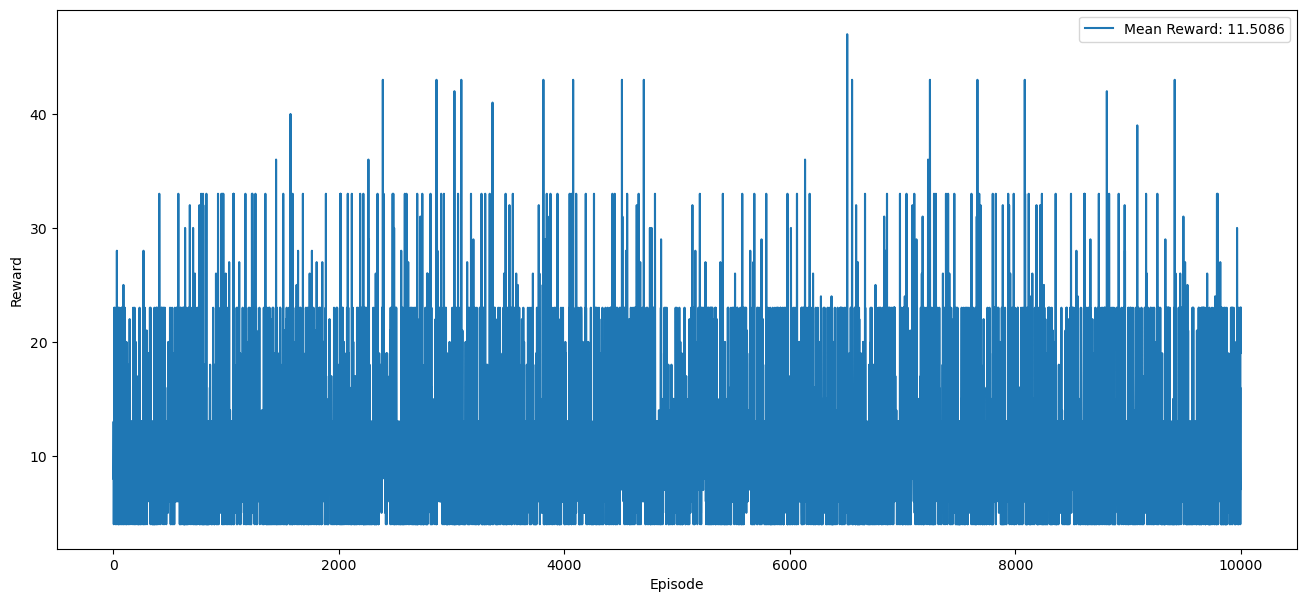

In [6]:
env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

baseline_agent = BaseAgent(env) 
baseline_rewards = baseline_agent.test(10_000, 5_000)

plt.figure(figsize=(16, 7))
plt.plot(baseline_rewards, label=f"Mean Reward: {baseline_rewards.mean()}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.savefig(os.path.join(FIG_PATH, "baseline-test-simple-env.png"))
plt.plot()

In [12]:
env = gym.make('TextFlappyBird-screen-v0', height=10, width=10, pipe_gap=4)

obs, info = env.reset()
render = None

cumulated_reward = 0
while True:

    action = env.action_space.sample()
    obs, reward, done, _, info = env.step(action)
    cumulated_reward += reward

    clear_output(wait=True)
    render = env.render()
    sys.stdout.write(render)
    time.sleep(0.2)

    if done:
        break

print(f"Cumulated reward: {cumulated_reward}")

Text Flappy Bird!
Score: 2
------------
[   |    | ]
[        | ]
[        | ]
[        | ]
[          ]
[   |      ]
[   |      ]
[   |      ]
[   |    | ]
[  *|    | ]
^^^^^^^^^^^^
(Idle)
Cumulated reward: 16
